In [1]:
import numpy as np
import pandas as pd
import os
import openpyxl

In [2]:
#Working directory beállítása
#mi van jelenleg beállítva --> ahonnan megnyitottuk a fájlt
print(os.getcwd())
#átállítás és ellenőrzés
os.chdir("C:/Users/Lenovo X390/Desktop/Rajk/II/II. Prog1/hw9-pappgergelymatyas-main")
print(os.getcwd())

#adatbázis: ESS 9. hullámával fogunk foglalkozni --> ismeri-e valaki
ess_9 = pd.read_excel("ESS9HU.xlsx", keep_default_na= True) #pd vel hivatkozunk a packagre, sokféle adatbázis típust be tud olvasni

#opciók
#pd.read

c:\Users\Lenovo X390\Desktop\Rajk\II\II. Prog1\hw10-pappgergelymatyas-main\hw10-pappgergelymatyas-main\homework
C:\Users\Lenovo X390\Desktop\Rajk\II\II. Prog1\hw9-pappgergelymatyas-main


In [ ]:
nem_tudja_ppltrst = ess_9[ess_9["ppltrst"] == 7]
nem_tudja_pplfair = ess_9[ess_9["pplfair" == 7]]
nem_tudja_ppltrst = ess_9[ess_9["ppltrst" == 8]]
nem_tudja_pplfair = ess_9[ess_9["pplfair" == 8]]

optimisita_ppltrst = ess_9[ess_9["ppltrst" >= 5]]
optimisita_ppltrst = ess_9[ess_9["pplfair" >= 5]]

pesszimista_ppltrst = ess_9[ess_9["ppltrst" < 5]]
pesszimista_pplfair = ess_9[ess_9["ppltrst" < 5]]



KeyError: False

In [13]:
nem_tudja_ppltrst = ess_9[(ess_9["ppltrst"] != 77) & (ess_9["ppltrst"] != 88)]
nem_tudja_pplfair = nem_tudja_ppltrst[(nem_tudja_ppltrst["pplfair"] != 77) & (nem_tudja_ppltrst["pplfair"] != 88)]


In [ ]:
nem_tudja_pplfair_kivancsisag = nem_tudja_pplfair["pplfair"].value_counts()
print(nem_tudja_pplfair_kivancsisag)

pplfair
5     307
6     267
7     241
4     183
3     180
8     139
2     131
0      80
1      65
9      35
10     21
Name: count, dtype: int64


In [17]:
nem_tudja_pplfair["pesszimista_ppltrst"] = nem_tudja_pplfair["ppltrst"].apply(lambda x: 0 if x <= 5 else 1)
nem_tudja_pplfair["pesszimista_pplfair"] = nem_tudja_pplfair["pplfair"].apply(lambda x: 0 if x <= 5 else 1)


C:\Users\Lenovo X390\AppData\Local\Temp\ipykernel_39628\1751545185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nem_tudja_pplfair["pesszimista_ppltrst"] = nem_tudja_pplfair["ppltrst"].apply(lambda x: 0 if x <= 5 else 1)
C:\Users\Lenovo X390\AppData\Local\Temp\ipykernel_39628\1751545185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nem_tudja_pplfair["pesszimista_pplfair"] = nem_tudja_pplfair["pplfair"].apply(lambda x: 0 if x <= 5 else 1)


In [20]:
nem_tudja_pplfair["tipologia"] = nem_tudja_pplfair["pesszimista_ppltrst"].map(str) + nem_tudja_pplfair["pesszimista_pplfair"].map(str)

nem_tudja_pplfair["tipologia"].value_counts()

C:\Users\Lenovo X390\AppData\Local\Temp\ipykernel_39628\1834480805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nem_tudja_pplfair["tipologia"] = nem_tudja_pplfair["pesszimista_ppltrst"].map(str) + nem_tudja_pplfair["pesszimista_pplfair"].map(str)


tipologia
00    753
11    488
01    215
10    193
Name: count, dtype: int64

In [22]:
nem_tudja_pplfair[["agea", "tipologia"]].groupby("tipologia").mean()


,agea
tipologia,
00,52.936255
01,52.706977
10,46.740933
11,48.950820


In [27]:
mAsTeR_TaBlA = nem_tudja_pplfair[(nem_tudja_pplfair["stfdem"] != 77) & (nem_tudja_pplfair["stfdem"] != 88)]

mAsTeR_TaBlA.pivot_table(
    values = "stfdem", index = "gndr", columns = "tipologia",
    aggfunc = "mean",
)

tipologia,00,01,10,11
gndr,,,,
1,3.558442,3.716049,4.986486,5.531818
2,3.958128,4.496063,4.400000,5.572581


6.777242624924744
6.643546441495778


<BarContainer object of 2 artists>

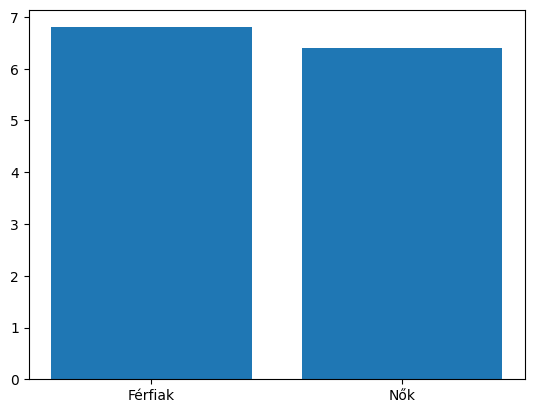

In [33]:
import matplotlib.pyplot as plt
import numpy as np

happy_atlag = ess_9[ess_9["happy"] <= 10] 

print(ess_9["happy"].mean())
print(happy_atlag["happy"].mean())


happy_max_ferfi = happy_atlag[happy_atlag["gndr"] == 1] 
ferfi_max = happy_max_ferfi["happy"].mean()

happy_max_no = happy_atlag[happy_atlag["gndr"] == 0] 
no_max = happy_max_no["happy"].mean()


nemek = ['Férfiak', 'Nők']
boldogság_index = [6.8, 6.4]

plt.bar(nemek, boldogság_index)
# plt.title('Burjánzó endorfin')
# plt.xlabel('Nemek')
# plt.ylabel('Átlag pontszám')
# plt.show()

In [34]:
szukites = ess_9[["agea", "eduyrs", "ppltrst", "pplfair", "cntry"]]
